<a href="https://colab.research.google.com/github/ArthurFonsecaSI/Redes-Neurais-/blob/main/Sigmoid_Aula_1_pr%C3%A1tica_e_intuitiva_sobre_Redes_Neurais_Ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para demonstrar a diferença de capacidade entre uma rede com um único neurônio e uma rede com dois neurônios em duas camadas, precisamos de um dataset que não seja linearmente separável. Um exemplo clássico é o problema do XOR, que já usamos anteriormente, mas para deixar mais claro, vou criar um dataset um pouco mais complexo: um círculo dentro de outro círculo (um problema de classificação circular).

Dataset: Círculos Concêntricos
Vamos gerar um dataset onde os pontos de uma classe estão dentro de um círculo e os pontos da outra classe estão em um anel ao redor desse círculo. Esse tipo de problema não pode ser resolvido por um único neurônio (que só pode aprender fronteiras lineares), mas pode ser resolvido por uma rede com dois neurônios em duas camadas (que pode aprender fronteiras não lineares).

Abaixo está o código que gera o dataset, treina as duas redes (uma com um neurônio e outra com dois neurônios em duas camadas) e mostra que a primeira rede não consegue aprender o problema, enquanto a segunda consegue:

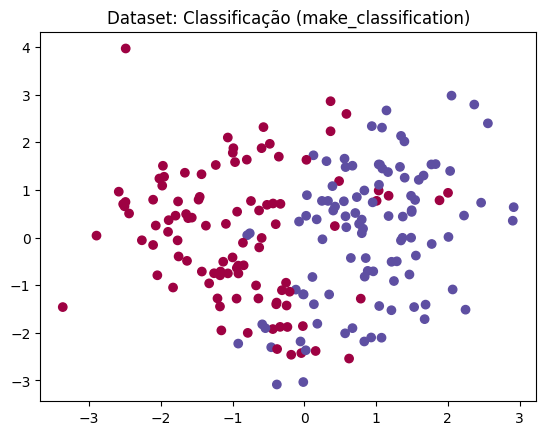

TypeError: 'NoneType' object is not callable

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Funções de ativação
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Gerar dataset de "meias luas"
X, y = make_classification(
    n_samples=200,      # número de amostras
    n_features=2,       # duas entradas (x1, x2)
    n_informative=2,    # ambas relevantes para a saída
    n_redundant=0,      # sem features redundantes
    n_classes=2,        # duas classes (0 ou 1)
    random_state=42
)
y = y.reshape(-1, 1)  # Transformar y em formato coluna


# Plot do dataset
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.Spectral)
plt.title("Dataset: Classificação (make_classification)")
plt.show()()

# Hiperparâmetros
learning_rate = 0.1
epochs = 80000

# ==============================================
# Rede com um único neurônio
# ==============================================
np.random.seed(42)
weights_1 = np.random.randn(2, 1)
bias_1 = np.random.randn()

errors_1 = []
for epoch in range(epochs):
    # Forward pass
    weighted_sum = np.dot(X, weights_1) + bias_1
    output = sigmoid(weighted_sum)

    # Cálculo do erro
    error = y - output
    errors_1.append(np.mean(np.square(error)))

    # Backpropagation
    d_error = -2 * error / len(X)
    d_output = sigmoid_derivative(weighted_sum)
    gradient = d_error * d_output

    weights_1 -= learning_rate * np.dot(X.T, gradient)
    bias_1 -= learning_rate * np.sum(gradient)

# Plot do erro da rede com um neurônio
plt.plot(range(epochs), errors_1, label="Rede com 1 neurônio")
plt.title("Erro ao longo do treinamento")
plt.xlabel("Época")
plt.ylabel("Erro")
plt.legend()
plt.show()

# Teste da rede com um neurônio
print("\nTeste da rede com um neurônio:")
predictions_1 = sigmoid(np.dot(X, weights_1) + bias_1)
predictions_1 = (predictions_1 > 0.5).astype(int)
print(f"Acurácia: {np.mean(predictions_1 == y) * 100:.2f}%")

# ==============================================
# Rede com dois neurônios em duas camadas
# ==============================================
np.random.seed(42)
# Camada 1: 2 entradas -> 2 neurônios
weights_1_layer1 = np.random.randn(2, 2)
bias_1_layer1 = np.random.randn(1, 2)

# Camada 2: 2 entradas (saída da camada 1) -> 1 neurônio
weights_1_layer2 = np.random.randn(2, 1)
bias_1_layer2 = np.random.randn()

errors_2 = []
for epoch in range(epochs):
    # Forward pass
    # Camada 1
    weighted_sum_1 = np.dot(X, weights_1_layer1) + bias_1_layer1
    output_1 = sigmoid(weighted_sum_1)

    # Camada 2
    weighted_sum_2 = np.dot(output_1, weights_1_layer2) + bias_1_layer2
    output_2 = sigmoid(weighted_sum_2)

    # Cálculo do erro
    error = y - output_2
    errors_2.append(np.mean(np.square(error)))

    # Backpropagation
    # Gradiente da camada 2
    d_error = -2 * error / len(X)
    d_output_2 = sigmoid_derivative(weighted_sum_2)
    gradient_2 = d_error * d_output_2

    # Gradiente da camada 1
    d_output_1 = sigmoid_derivative(weighted_sum_1)
    gradient_1 = np.dot(gradient_2, weights_1_layer2.T) * d_output_1

    # Atualização dos pesos e viés
    weights_1_layer2 -= learning_rate * np.dot(output_1.T, gradient_2)
    bias_1_layer2 -= learning_rate * np.sum(gradient_2, axis=0)

    weights_1_layer1 -= learning_rate * np.dot(X.T, gradient_1)
    bias_1_layer1 -= learning_rate * np.sum(gradient_1, axis=0)

# Plot do erro da rede com dois neurônios
plt.plot(range(epochs), errors_2, label="Rede com 2 neurônios", color="orange")
plt.title("Erro ao longo do treinamento")
plt.xlabel("Época")
plt.ylabel("Erro")
plt.legend()
plt.show()

# Teste da rede com dois neurônios
print("\nTeste da rede com dois neurônios:")
output_1 = sigmoid(np.dot(X, weights_1_layer1) + bias_1_layer1)
output_2 = sigmoid(np.dot(output_1, weights_1_layer2) + bias_1_layer2)
predictions_2 = (output_2 > 0.5).astype(int)
print(f"Acurácia: {np.mean(predictions_2 == y) * 100:.2f}%")


Conclusão
Esse exemplo mostra claramente a importância de adicionar mais neurônios e camadas para resolver problemas não linearmente separáveis. A rede com um único neurônio não tem capacidade suficiente para aprender o dataset, enquanto a rede com dois neurônios em duas camadas consegue.